## Import Libraries

In [3]:
import subprocess
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import pytubefix
import torch
import torchvision
from IPython.display import Video
from pytubefix import YouTube
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid

In [4]:
print("torch version : ", torch.__version__)
print("pytube version : ", pytubefix.__version__)
print("torchvision version : ", torchvision.__version__)
print("cv2 version : ", cv2.__version__)

!python --version

torch version :  2.7.1+cpu
pytube version :  9.5.0
torchvision version :  0.22.1+cpu
cv2 version :  4.12.0
Python 3.11.4


In [22]:
project_dir = Path("project4")
data_dir = "data"
video_dir = project_dir / data_dir

print(video_dir)

project4\data


In [23]:
video_name = "mary_kom.mp4"
video_url = "https://www.youtube.com/watch?v=XScnCdyVbIU"
yt = YouTube(video_url)

In [25]:
!ls -l project4/data/

total 152324
-rw-r--r-- 1 hp 197121 155978059 Sep 11 16:21 mary_kom.mp4


In [26]:
# The following variables you've already defined will be helpful
print(video_dir)
print(video_name)

project4\data
mary_kom.mp4


In [27]:
input_video = video_dir / video_name

print(input_video)

project4\data\mary_kom.mp4


In [28]:
Video(input_video, width=400)

In [29]:
def cut_video(input_file, output_file, start__time, duration):
    """
    Cuts a portion of the video.

    input_file:parameter input_file: Path to the input video file.
    output_file:parameter output_file: Path to the output video file.
    start_time:parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
    duration:parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
    """
    command = [
        "ffmpeg",
        "-ss",
        str(start_time),
        "-i",
        input_file,
        "-t",
        str(duration),
        "-c",
        "copy",
        output_file,
    ]
    subprocess.run(command)


cut_video?

Signature: cut_video(input_file, output_file, start__time, duration)
Docstring:
Cuts a portion of the video.

input_file:parameter input_file: Path to the input video file.
output_file:parameter output_file: Path to the output video file.
start_time:parameter start_time: Start time of the cut in seconds or in `HH:MM:SS` format.
duration:parameter duration: Duration of the cut in seconds or in `HH:MM:SS` format.
File:      c:\users\hp\appdata\local\temp\ipykernel_7208\644617062.py
Type:      function

In [30]:
output_video_name = "output.mp4"

output_video = video_dir/output_video_name

print(output_video)

project4\data\output.mp4


In [31]:
start_time = "00:00:00"  # Start at 00 seconds
duration = "00:01:00"  # Cut 1 minute

# Call cut_video function
cut_video(input_video, output_video, start_time, duration)

In [32]:
# Display the video
Video(output_video, width=400)

In [33]:
video_capture = cv2.VideoCapture(output_video)

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count}")

Frame rate: 25.0
Total number of frames: 1501


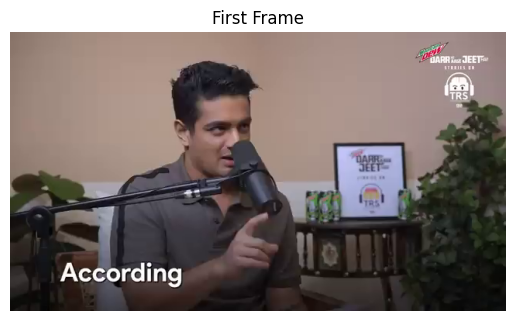

In [34]:
ret, first_frame = video_capture.read()

if ret:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

In [35]:
height, width, channel = first_frame.shape

print("frames height : ", height)
print("frames width : ", width)
print("frames channel : ", channel)

frames height :  360
frames width :  640
frames channel :  3


In [36]:
frames_dir = video_dir/"extracted_frames"

frames_dir.mkdir(exist_ok=True)
print(frames_dir)

project4\data\extracted_frames


In [37]:
interval = frame_rate * 0.20  # Extract every fifth frame from the video
frame_count = 0

print("Start extracting individual frames...")
while True:
    # read next frame from the video_capture
    ret, frame = video_capture.read()
    if not ret:
        print("Finished!")
        break  # Break the loop if there are no more frames

    # Save frames at every 'interval' frames
    if frame_count % 5 == 0:
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

Start extracting individual frames...
Finished!


In [38]:
n_extraced_frames = len(list(frames_dir.iterdir()))
print(f"We saved {n_extraced_frames} frames.")

We saved 300 frames.


In [39]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))
            
            # Define resizing transformation that resizes to 240 x 240
            resize_transform = transforms.Resize((240, 240))
            # Resize image by using `resize_transform`
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images?

Signature: display_sample_images(dir_path, sample=5)
Docstring: <no docstring>
File:      c:\users\hp\appdata\local\temp\ipykernel_7208\3359215917.py
Type:      function

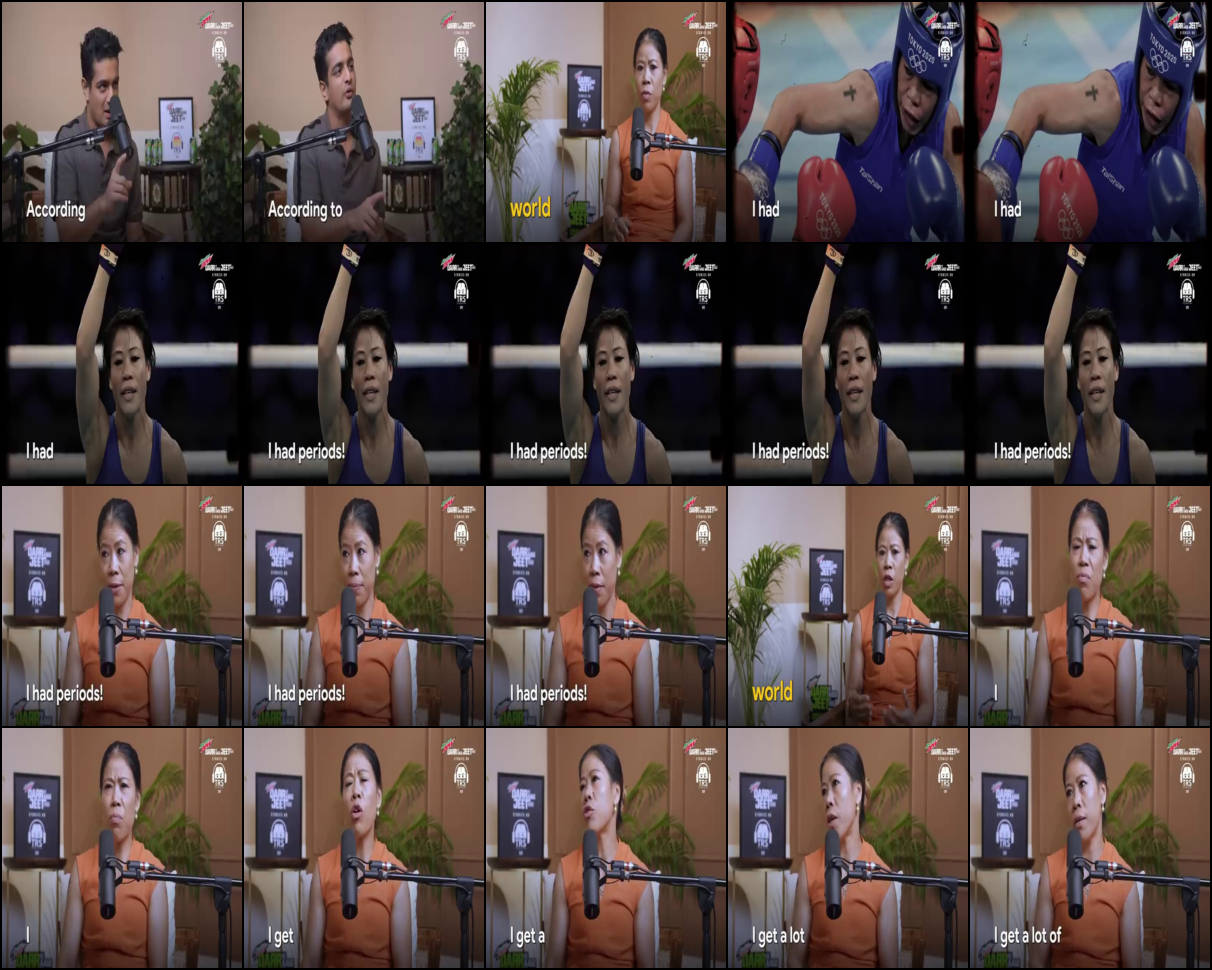

In [40]:
# Call function `display_sample_images` on `frames_dir`
display_sample_images(frames_dir, sample=20)